# Salary Analysis

In [22]:
# import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%run utils.ipynb

### Load data

In [23]:
df = pd.read_csv('complete_refined.csv', index_col=[0])

## Average Salary

In [24]:
# remove zeros
# if salary column has a value but 'min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 
# 'max_yearly_salary' are missing, fill missing values 
salary_cols = ['salary', 'min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 'max_yearly_salary']
df = clean_salary(df, salary_cols)

In [25]:
# randomly sample some data to double check the salary columns are populated properly
samples = df.sample(n=20)
samples[salary_cols]

,salary,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary
362,"$100,000.00/yr - $105,000.00/yr",NaN,NaN,100000.0,105000.0
1057,"$200,740.00/yr - $253,430.00/yr",NaN,NaN,200740.0,253430.0
119,NaN,NaN,NaN,NaN,NaN
1041,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN
1319,NaN,NaN,NaN,NaN,NaN
403,NaN,NaN,NaN,NaN,NaN
571,"$45,500.00/yr - $48,500.00/yr",NaN,NaN,45500.0,48500.0
919,NaN,NaN,NaN,150000.0,223000.0
167,"$160,000.00/yr - $210,000.00/yr",NaN,NaN,160000.0,210000.0


In [26]:
# calculate AI generated salary and compare to the scraped data
print('# of company paid by hour: ', df['min_hourly_salary'].notna().sum())
print('# of company paid by year: ', df['min_yearly_salary'].notna().sum())
print('# of company no salary info: ', ((df['min_yearly_salary'].isna()) & (df['min_hourly_salary'].isna())).sum())

# of company paid by hour:  90
# of company paid by year:  342
# of company no salary info:  351


In [27]:
# calculte the average salary from salary range
df['avg_hourly_salary'] = df.apply(calculate_average_salary, axis=1, col_min='min_hourly_salary', col_max='max_hourly_salary')
df['avg_yearly_salary'] = df.apply(calculate_average_salary, axis=1, col_min='min_yearly_salary', col_max='max_yearly_salary')

In [28]:
print('# of company paid by hour: ', df['avg_hourly_salary'].notna().sum())
print('# of company paid by year: ', df['avg_yearly_salary'].notna().sum())
print('# of company no salary info: ', ((df['avg_hourly_salary'].isna()) & (df['avg_yearly_salary'].isna())).sum())

# of company paid by hour:  90
# of company paid by year:  344
# of company no salary info:  349


In [29]:
# pre-processing is done, start exploration by doing some visualization
df.to_csv('salary_vis.csv')

In [30]:
df = pd.read_csv('salary_vis.csv', index_col=[0])
df.head()

,applicationsCount,applyType,applyUrl,benefits,companyId,companyName,companyUrl,contractType,experienceLevel,id,...,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary,required_degree,remote_work,required_skills,simplified_job_title,avg_hourly_salary,avg_yearly_salary
0,Over 200 applicants,EASY_APPLY,https://www.linkedin.com/jobs/view/data-analys...,NaN,2857634.0,Coinbase,https://www.linkedin.com/company/coinbase?trk=...,Full-time,Entry level,4097009239,...,NaN,NaN,131325.0,154500.0,NaN,NaN,"['SQL', 'data modeling', 'Python', 'data visua...",Data Analyst,NaN,142912.5
1,Over 200 applicants,EXTERNAL,https://www.disneycareers.com/job/-/-/391/7445...,NaN,1292.0,The Walt Disney Company,https://www.linkedin.com/company/the-walt-disn...,Full-time,Mid-Senior level,4100979607,...,NaN,NaN,99900.0,133900.0,BS,NaN,"['SQL', 'data communication', 'data platforms'...",Data Analyst,NaN,116900.0
2,Over 200 applicants,EXTERNAL,https://job-boards.greenhouse.io/paretocaptive...,NaN,3345136.0,ParetoHealth,https://www.linkedin.com/company/pareto-health...,Full-time,Entry level,4084525629,...,NaN,NaN,NaN,NaN,BS,True,"['data analysis', 'underwriting', 'stop-loss',...",Data Analyst,NaN,NaN
3,Over 200 applicants,EXTERNAL,https://www.thirdlove.com/pages/jobs?gh_jid=77...,NaN,6452967.0,ThirdLove,https://www.linkedin.com/company/thirdlove?trk...,Full-time,Associate,4098608177,...,NaN,NaN,90000.0,140000.0,BS,NaN,"['SQL', 'data manipulation', 'data visualizati...",Data Analyst,NaN,115000.0
6,Over 200 applicants,EXTERNAL,https://careers.mcafee.com/global/en/job/MCAFG...,NaN,2336.0,McAfee,https://www.linkedin.com/company/mcafee?trk=pu...,Full-time,Not Applicable,4102473051,...,NaN,NaN,81120.0,133260.0,NaN,True,"['SQL', 'Python', 'R', 'data visualization', '...",Data Analyst,NaN,107190.0


## Data Exploration and Visualization

### Salary stats

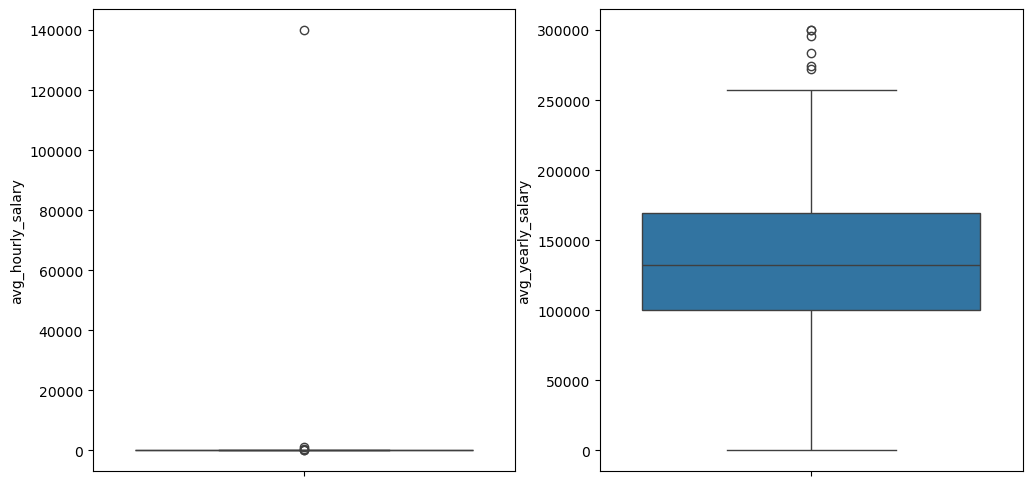

In [31]:
# salary distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, y='avg_hourly_salary', ax=axes[0])
sns.boxplot(data=df, y='avg_yearly_salary', ax=axes[1])
plt.show()

Yearly salary looks normal. Hourly has some big outliers.

In [32]:
# lookup outliers
df[((df['avg_hourly_salary']>200) | (df['avg_hourly_salary']<15))][salary_cols]

,salary,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary
200,NaN,11.0,13.0,NaN,NaN
242,NaN,1000.0,1100.0,200000.0,220000.0
437,$457.00/hr - $457.00/hr,457.0,457.0,NaN,NaN
1229,"$120,000.00/hr - $160,000.00/hr",120000.0,160000.0,NaN,NaN


In [33]:
df[((df['avg_yearly_salary']<20000))][salary_cols]

,salary,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary
938,$65.00/yr - $70.00/yr,NaN,NaN,65.0,70.0
1361,NaN,NaN,NaN,115.0,135.0


After double check the job posting, 200 is a intern with low pay, 437 also looks noraml eventhough the salary is quite high. 242 doesn't have hourly pay so it's probably an error made by AI. 1229 looks like a human error, it should be a yearly salary, not by hour. Delete hourly pay of 242, change salary of 1229 to year.

In [34]:
df.loc[200, ['min_hourly_salary', 'max_hourly_salary']] = [None, None]
df.loc[242, ['min_hourly_salary', 'max_hourly_salary']] = [None, None]
df.loc[437, ['min_hourly_salary', 'max_hourly_salary']] = [130, 130]
df.loc[938, ['salary', 'min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 'max_yearly_salary']] = ['$65.00/hr - $70.00/hr', 65, 70, None, None]
df.loc[1229, ['salary', 'min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 'max_yearly_salary']] = ['$120,000.00/yr - $160,000.00/yr', None, None, 120000, 160000]
df.loc[1361, ['min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 'max_yearly_salary']] = [115, 135, None, None]
df.loc[[200, 242, 437, 938, 1229, 1361]][salary_cols]

,salary,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary
200,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,200000.0,220000.0
437,$457.00/hr - $457.00/hr,130.0,130.0,NaN,NaN
938,$65.00/hr - $70.00/hr,65.0,70.0,NaN,NaN
1229,"$120,000.00/yr - $160,000.00/yr",NaN,NaN,120000.0,160000.0
1361,NaN,115.0,135.0,NaN,NaN


In [35]:
df['avg_hourly_salary'] = df.apply(calculate_average_salary, axis=1, col_min='min_hourly_salary', col_max='max_hourly_salary')
df['avg_yearly_salary'] = df.apply(calculate_average_salary, axis=1, col_min='min_yearly_salary', col_max='max_yearly_salary')

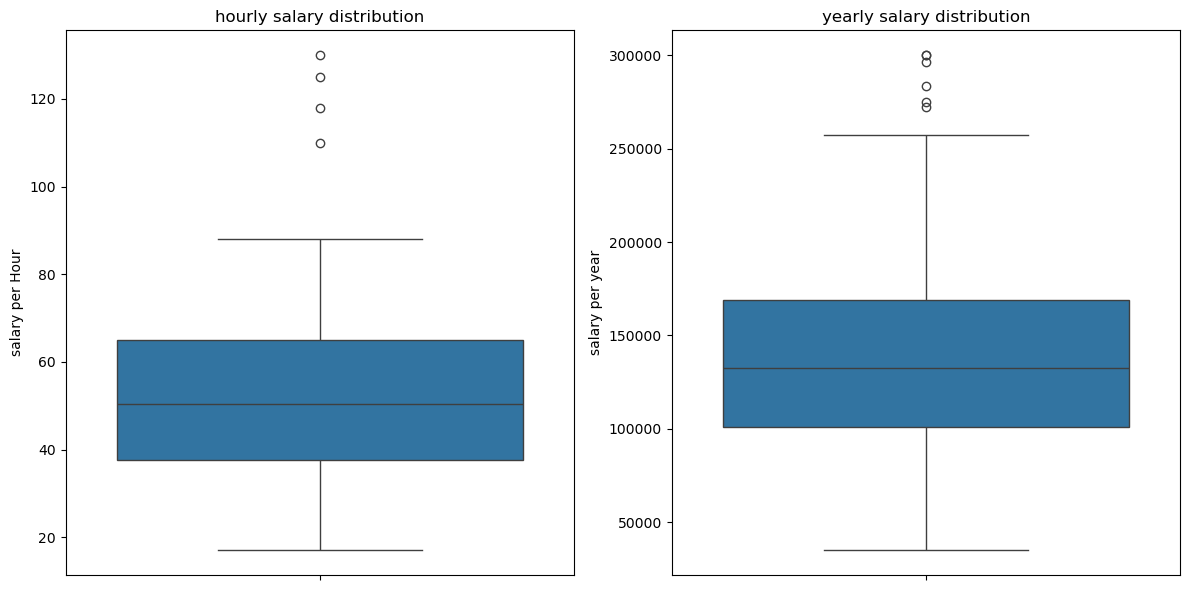

In [36]:
# salary distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, y='avg_hourly_salary', ax=axes[0])
sns.boxplot(data=df, y='avg_yearly_salary', ax=axes[1])
format_plot(axes[0], title='hourly salary distribution', ylabel='salary per Hour')
format_plot(axes[1], title='yearly salary distribution', ylabel='salary per year')
plt.savefig("salary_boxplot.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

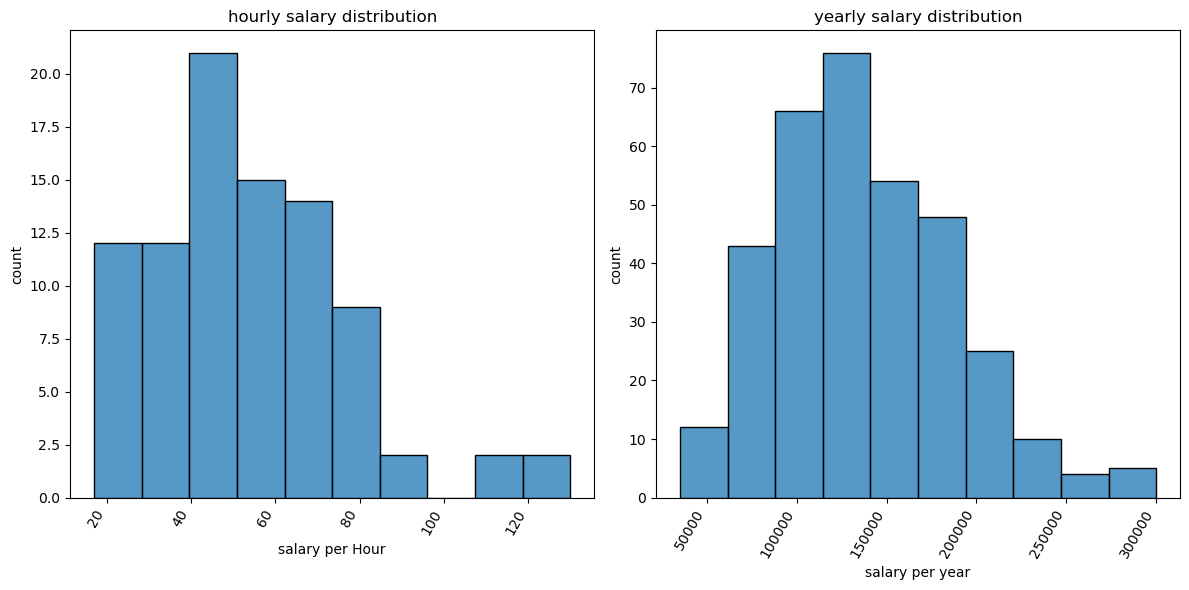

In [37]:
# salary distribution
%run utils.ipynb
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df, x='avg_hourly_salary', bins=10, ax=axes[0])
sns.histplot(data=df, x='avg_yearly_salary', bins=10, ax=axes[1])
format_plot(axes[0], title='hourly salary distribution', ylabel='count', xlabel='salary per Hour')
format_plot(axes[1], title='yearly salary distribution', ylabel='count', xlabel='salary per year')
plt.savefig("salary_histgram.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [38]:
df['avg_hourly_salary'].describe()

count     89.000000
mean      53.452303
std       22.866196
min       17.000000
25%       37.720000
50%       50.425000
75%       65.000000
max      130.000000
Name: avg_hourly_salary, dtype: float64

In [39]:
df['avg_yearly_salary'].describe()

count       343.000000
mean     137813.094490
std       50071.852504
min       35040.000000
25%      100918.750000
50%      132500.000000
75%      169150.000000
max      300000.000000
Name: avg_yearly_salary, dtype: float64

In [40]:
df.to_csv('salary_vis2.csv')

In [41]:
df = pd.read_csv('salary_vis2.csv', index_col=[0])

### Salary distribution, statistics and trend

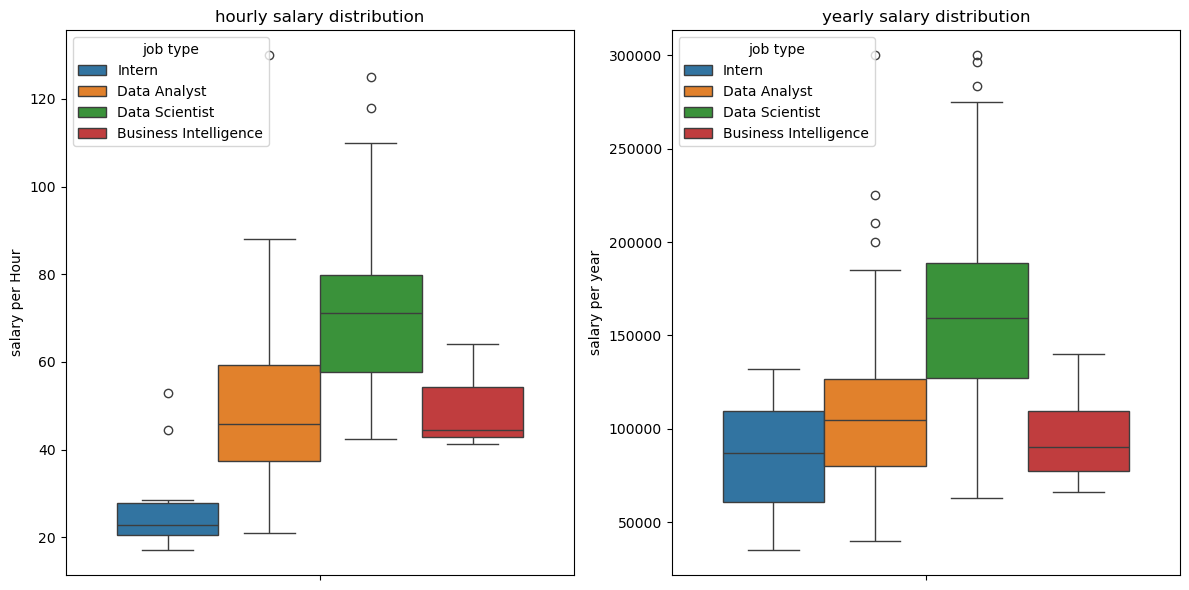

In [42]:
title_order = ['Intern', 'Data Analyst', 'Data Scientist', 'Business Intelligence']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot salary distribution
sns.boxplot(data=df, y='avg_hourly_salary', hue='simplified_job_title', hue_order=title_order, ax=axes[0])
sns.boxplot(data=df, y='avg_yearly_salary', hue='simplified_job_title', hue_order=title_order, ax=axes[1])
format_plot(axes[0], title='hourly salary distribution', ylabel='salary per Hour', legend_title='job type')
format_plot(axes[1], title='yearly salary distribution', ylabel='salary per year', legend_title='job type')
plt.savefig("salary_by_job.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [43]:
df.groupby('simplified_job_title')['avg_yearly_salary'].describe()

,count,mean,std,min,25%,50%,75%,max
simplified_job_title,,,,,,,,
Business Intelligence,16.0,94907.500000,22388.255105,66500.0,77625.0,90225.0,109375.0,140000.0
Data Analyst,124.0,108172.508065,39142.912818,40000.0,80000.0,105000.0,126625.0,300000.0
Data Scientist,200.0,160419.702050,45262.937000,63000.0,127010.0,159150.0,188625.0,300000.0
Intern,3.0,84680.000000,48521.615802,35040.0,61020.0,87000.0,109500.0,132000.0


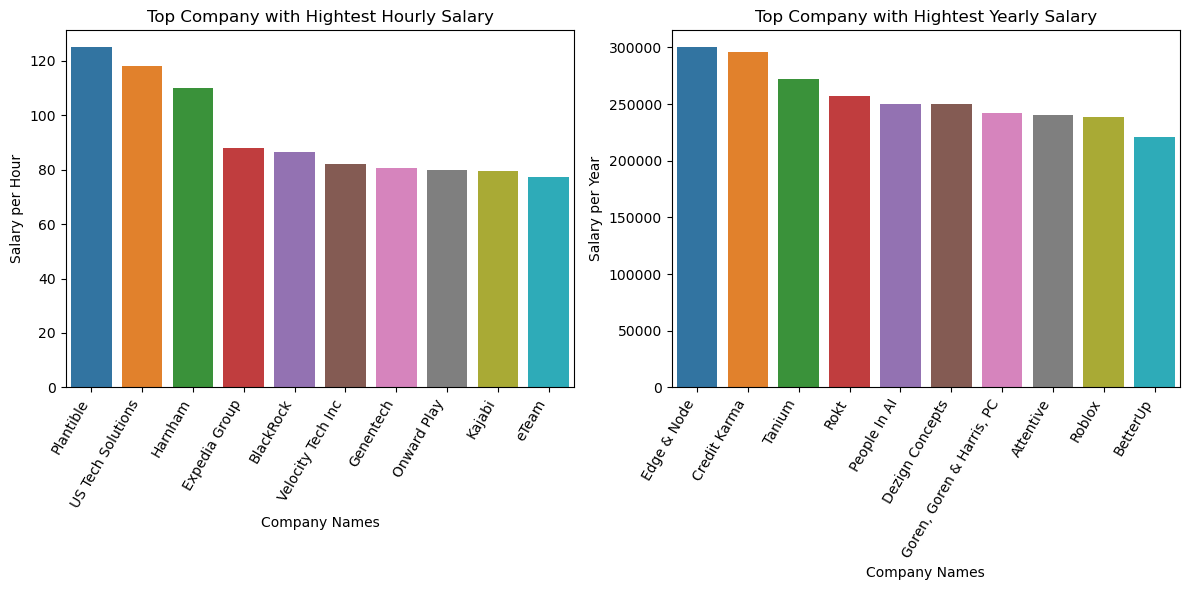

In [44]:
# company paid the most
# %run utils.ipynb
sorted_hourly_salary = df.groupby('companyName')[['avg_hourly_salary']].mean(numeric_only=True).sort_values(by='avg_hourly_salary', ascending=False)[1:11] # exclude the outlier
sorted_yearly_salary = df.groupby('companyName')[['avg_yearly_salary']].mean(numeric_only=True).sort_values(by='avg_yearly_salary', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=sorted_hourly_salary, x='companyName', y='avg_hourly_salary', ax=axes[0], hue='companyName')
sns.barplot(data=sorted_yearly_salary, x='companyName', y='avg_yearly_salary', ax=axes[1], hue='companyName')
format_plot(axes[0], 'Top Company with Hightest Hourly Salary', 'Company Names', 'Salary per Hour')
format_plot(axes[1], 'Top Company with Hightest Yearly Salary', 'Company Names', 'Salary per Year')
plt.savefig("salary_top_companies.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

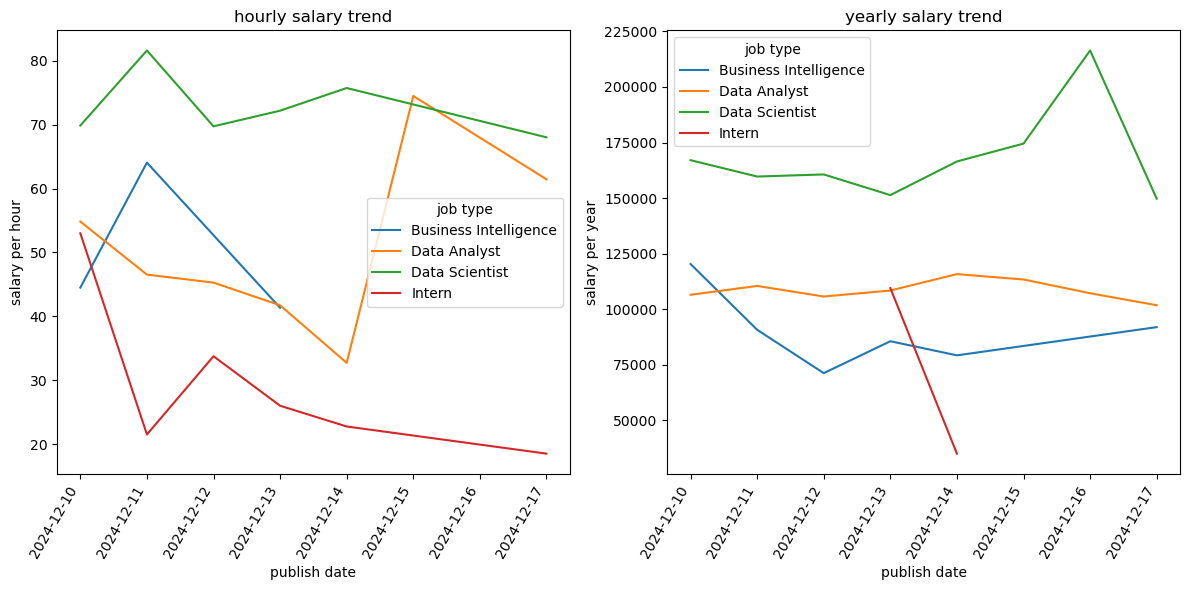

In [45]:
# trend of salary
hourly_salary_trend = df.groupby(['publishedAt', 'simplified_job_title'])[['avg_hourly_salary']].mean(numeric_only=True)
yearly_salary_trend = df.groupby(['publishedAt','simplified_job_title'])[['avg_yearly_salary']].mean(numeric_only=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.lineplot(data=hourly_salary_trend, x='publishedAt', y='avg_hourly_salary', hue='simplified_job_title', ax=axes[0])
sns.lineplot(data=yearly_salary_trend, x='publishedAt', y='avg_yearly_salary', hue='simplified_job_title', ax=axes[1])
format_plot(axes[0], 'hourly salary trend', 'publish date', 'salary per hour', 'job type')
format_plot(axes[1], 'yearly salary trend', 'publish date', 'salary per year', 'job type')
plt.savefig("salary_trend.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()